In [3]:
import psycopg2
import psycopg2.extras
import os

def conecta_db():
      con = psycopg2.connect(host='localhost', 
                         database='ctt2025',
                         user='postgres', 
                         password='1983')
      return con


def criar_db(sql):
    con = conecta_db()
    cur = con.cursor()
    cur.execute(sql)
    con.commit()
    con.close()


def inserir_db(sql):
    con = conecta_db()
    cur = con.cursor()
    try:
        cur.execute(sql)
        con.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        con.rollback()
        cur.close()
        return 1
    cur.close()

sql = ''' CREATE TABLE IF NOT EXISTS Expresso_2025 (
                                    DATA_CRIACAO      text,
                                    CENTRO    text,
                                    Giro text,
                                    LOPTICA  text,
                                    JANELA_HORARIA text,
                                    NOME text,
                                    MORADA text,
                                    CP text,
                                    LOCALIDADE text,
                                    COD_T_EVEN text,
                                    DATA_EVENTO text,
                                    LATITUDE text,
                                    LONGITUDE text) '''
criar_db(sql)


In [ ]:
query_filtro_data="SELECT *, CAST(SUBSTRING(data_criacao, 7, 4) || SUBSTRING(data_criacao, 4, 2) || SUBSTRING(data_criacao, 1, 2) AS INTEGER) AS sortable_date_int FROM Expresso_2025 where CAST(SUBSTRING(data_criacao, 7, 4) || SUBSTRING(data_criacao, 4, 2) || SUBSTRING(data_criacao, 1, 2) AS INTEGER) > 20250901;"
con = conecta_db()
cur = con.cursor(cursor_factory=psycopg2.extras.DictCursor)
query = query_filtro_data
#query = "select * from expresso_2023 where centro='8819009'"
cur.execute(query)
results_expresso_ = cur.fetchall()



In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(results_expresso_,columns=['data_criacao', 'centro', 'Giro', 'LOPTICA', 'JANELA_HORARIA', 'NOME', 'MORADA', 'CP', 'LOCALIDADE', 'COD_T_EVEN', 'DATA_EVENTO', 'LATITUDE', 'LONGITUDE','sortable_date_int'])
df.columns=[x.lower().strip() for x in df.columns]
print(len(df))
df.drop_duplicates()
print(len(df))

9428473
9428473


In [ ]:
df.centro.unique()
df.janela_horaria.unique()
df.cod_t_even.unique()

array(['I', 'H', 'D', 'M'], dtype=object)

In [ ]:
contagem_linhas = df.groupby(['centro', 'janela_horaria', 'cod_t_even']).size().reset_index(name='numero_de_linhas')
contagem_linhas

,centro,janela_horaria,cod_t_even,numero_de_linhas
0,8811373,06-13,H,96
1,8811373,06-13,I,12924
2,8811373,06-13,M,2
3,8811373,08-10,D,1
4,8811373,08-10,H,2
...,...,...,...,...
398,8819009,SABADO,I,21905
399,8819009,SABADO,M,2
400,8819009,TARDE,D,18
401,8819009,TARDE,H,30


In [ ]:
contagem_moradas = df['morada'].value_counts()
contagem_moradas.head(50)
df_filtrado = df[df['morada'].str.contains('Praceta', case=False, na=False) & (df['morada'].str.contains('Cesário', na=False))]
contagem_moradas_2 = df_filtrado['morada'].value_counts()
print(len(contagem_moradas_2))
contagem_moradas_2.head(50)

0


Series([], Name: count, dtype: int64)

In [ ]:

contagem_moradas_sem_pre_aviso = df['morada'].isnull().sum()
contagem_linhas_totais = len(df['morada'])
print(f"Total de linhas na coluna 'morada' (incluindo nulos): {contagem_linhas_totais}")
print(f"Número de linhas nulas na coluna 'morada': {contagem_moradas_sem_pre_aviso}")
percentagem_moradas_nulas = (contagem_moradas_sem_pre_aviso / contagem_linhas_totais) * 100
print(f"Porcentagem de linhas nulas na coluna 'morada': {percentagem_moradas_nulas:.2f}%")

Total de linhas na coluna 'morada' (incluindo nulos): 9428473
Número de linhas nulas na coluna 'morada': 24692
Porcentagem de linhas nulas na coluna 'morada': 0.26%


In [ ]:
df

,data_criacao,centro,giro,loptica,janela_horaria,nome,morada,cp,localidade,cod_t_even,data_evento,latitude,longitude,sortable_date_int
0,10/05/2024,8817018,4980ATRANSFER,DD047494096PT,None,None,None,4980,PONTE DA BARCA,I,10/05/2024 12:14:33,41.8050955,-8.4151841,20240510
1,02/05/2024,8811373,2795E LUIS GO,DW832335461PT,09-19,CAIO GON ALVES,RUA ENGENHEIRO JOSÉ FREDERICO ULRIC 1 ANDAR E...,2795-113,LINDA A VELHA,H,02/05/2024 21:24:52,38.8288407,-9.3069423,20240502
2,02/05/2024,8811373,2795E LUIS GO,DW832322471PT,09-19,CAIO GON ALVES,RUA ENGENHEIRO JOSÉ FREDERICO ULRIC 1 ANDAR E...,2795-113,LINDA A VELHA,H,02/05/2024 21:24:47,38.8288407,-9.3069423,20240502
3,02/05/2024,8811373,2795E LUIS GO,FA864456378PT,None,"PALMO E MEIO - COMERCIO DE VESTUARIO, LD","AV. 25 DE ABRIL, N. 20-A",2795-196,LINDA A VELHA,H,02/05/2024 21:22:20,38.8288407,-9.3069423,20240502
4,02/05/2024,8811373,2795E LUIS GO,DW832120148PT,09-19,ANDI SICWEBU,RUA DE CEUTA NO.25 APARTMENT 5A,2795-058,LINDA A VELHA,H,02/05/2024 21:21:45,38.8288407,-9.3069423,20240502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9428468,23/06/2024,8819009,2860D AIRAC,DW842400289PT,SABADO,MIGUEL GALRITO,ESTRADA MUNICIPAL DO CARVALHINHO FABRICA DE MÁ...,2860-293,MOITA,H,23/06/2024 11:10:39,38.634906666666666,-8.982066666666666,20240623
9428469,23/06/2024,8819009,2860D AIRAC,DD108129434PT,DOMINGO,ANDREIA GODINHO,"QUINTA DO CARVALHINHO, RUA DE PALMELA ND",2860-297,MOITA,I,23/06/2024 11:10:27,38.63506666666667,-8.982336666666667,20240623
9428470,23/06/2024,8819009,2860D AIRAC,DD108129540PT,DOMINGO,CARLA PATRONILHO,"QUINTA DO CARVALHINHO, RUA DE PALMELA ND",2860-297,MOITA,I,23/06/2024 11:10:27,38.63506666666667,-8.982336666666667,20240623
9428471,23/06/2024,8819009,2860D AIRAC,DD108130097PT,DOMINGO,DJAMYLLA TORRES,QUINTA DO CARVALHINHO,2860,MOITA,I,23/06/2024 11:10:27,38.63506666666667,-8.982336666666667,20240623


In [ ]:
# Conversão da coluna data_criacao para datetime
df['data_criacao'] = pd.to_datetime(df['data_criacao'], format='%d/%m/%Y')

# Mapeamento dos nomes dos meses em português e em números
meses_portugues = {
    'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 'April': 'Abril',
    'May': 'Maio', 'June': 'Junho', 'July': 'Julho', 'August': 'Agosto',
    'September': 'Setembro', 'October': 'Outubro', 'November': 'Novembro', 'December': 'Dezembro'
}
meses_numeros = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4,
    'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8,
    'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}

# Adicionar coluna de semana do ano e mês correspondente em português
df['semana_ano'] = df['data_criacao'].dt.isocalendar().week
df['mes'] = df['data_criacao'].dt.strftime('%B').map(meses_portugues)

# Função para calcular a percentagem de CPs com comprimento 8 por semana
def calcular_percentagem(df):
    # Verificar o comprimento do CP
    df['cp_length'] = df['cp'].str.len()
    
    # Agrupar por semana e mês e calcular a percentagem
    percentagem_por_semana = df.groupby(['semana_ano', 'mes']).apply(
        lambda x: round((x['cp_length'] == 8).sum() / len(x) * 100, 1)
    ).reset_index(name='percentagem_cp_comprimento_8')
    
    # Combinar semana e mês
    percentagem_por_semana['semana_mes'] = percentagem_por_semana['semana_ano'].astype(str) + '-' + percentagem_por_semana['mes']
    
    # Adicionar coluna de mês em números para ordenação
    percentagem_por_semana['mes_num'] = percentagem_por_semana['mes'].map(meses_numeros)
    
    # Ordenar por mês numérico e semana do ano
    percentagem_por_semana = percentagem_por_semana.sort_values(by=['mes_num', 'semana_ano'])
    
    return percentagem_por_semana[['semana_mes', 'percentagem_cp_comprimento_8']]

# Calcular a percentagem
resultado = calcular_percentagem(df)

# Exibir o resultado
print(resultado)


   semana_mes  percentagem_cp_comprimento_8
0     18-Maio                          95.8
1     19-Maio                          95.3
2     20-Maio                          95.6
3     21-Maio                          95.7
5     22-Maio                          96.5
4    22-Junho                          97.4
6    23-Junho                          96.6
7    24-Junho                          96.8
8    25-Junho                          96.6
9    26-Junho                          97.0
10   27-Julho                          96.3
11   28-Julho                          96.1
12   29-Julho                          96.9
13   30-Julho                          97.2
15   31-Julho                          96.8
14  31-Agosto                          96.7
16  32-Agosto                          96.7


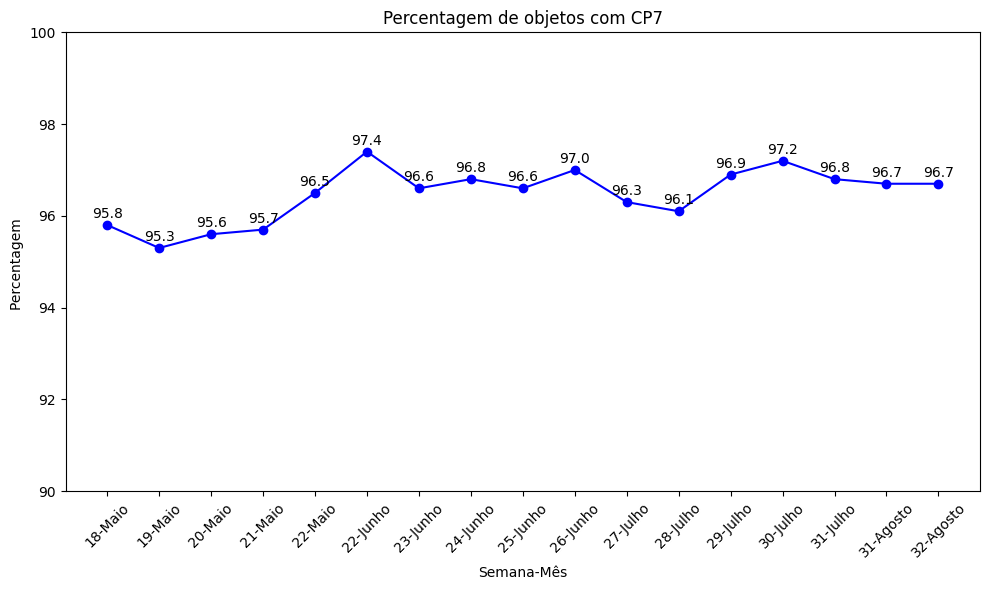

In [ ]:
import matplotlib.pyplot as plt

# Adicionar a coluna de ordenação para garantir a ordem correta
resultado['mes_num'] = resultado['semana_mes'].apply(lambda x: meses_numeros[x.split('-')[1]])
resultado['semana_ano'] = resultado['semana_mes'].apply(lambda x: int(x.split('-')[0]))

# Função para criar o gráfico de linhas com labels em cada ponto
def criar_grafico_com_labels(resultado, y_min=None, y_max=None):
    # Certificar-se de que os dados estão ordenados corretamente
    resultado = resultado.sort_values(by=['mes_num', 'semana_ano'])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(resultado['semana_mes'], resultado['percentagem_cp_comprimento_8'], marker='o', linestyle='-', color='blue')
    ax.set_xlabel('Semana-Mês')
    ax.set_ylabel('Percentagem ')
    ax.set_title('Percentagem de objetos com CP7')
    
    # Adicionar labels em cada ponto
    for i, txt in enumerate(resultado['percentagem_cp_comprimento_8']):
        ax.annotate(f'{txt}', (resultado['semana_mes'].iloc[i], resultado['percentagem_cp_comprimento_8'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')
    
    # Definir os limites do eixo y, se fornecidos
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Exemplo de uso da função com escala no eixo y
criar_grafico_com_labels(resultado, y_min=90, y_max=100)

# Figure quality 
%config InlineBackend.figure_format = 'svg'